# Nilm Reader Unit Tests

In [1]:
from nilm_reader import nilm_reader
import matplotlib.pyplot as plt
%matplotlib inline
from nilm_utils import *

In [2]:
DATA_DIR = ('data/ukdale/house_1')

### Read Data

In [3]:
reader = nilm_reader(DATA_DIR)
reader.load_meter('office_lamp')
reader.load_meter('fridge')

In [4]:
reader.meters['office_lamp'].keys()

dict_keys([48, 49, 50])

In [5]:
reader.meters['office_lamp'][48].head()

1365707341    14
1365707348    14
1365707354    14
1365707360    14
1365707367    14
dtype: int64

In [6]:
for i in reader.meters:
    print(i)

office_lamp
fridge


### Meter Stats

In [7]:
reader.meter_stats('office_lamp', 48) # return specific single meter

{48: ['2013-04-12 03:09:01', '2017-04-27 01:35:12']}

In [8]:
reader.meter_stats('office_lamp') # return all meters with same name

{48: ['2013-04-12 03:09:01', '2017-04-27 01:35:12'],
 49: ['2013-04-12 03:09:02', '2017-04-27 01:35:19'],
 50: ['2013-04-12 03:09:02', '2017-04-27 01:35:33']}

In [9]:
reader.meter_stats(meter_num=48) # only give meter num

{48: ['2013-04-12 03:09:01', '2017-04-27 01:35:12']}

In [10]:
reader.meter_stats() # return stats of all meters

{12: ['2012-12-15 06:21:38', '2017-04-27 01:32:51'],
 48: ['2013-04-12 03:09:01', '2017-04-27 01:35:12'],
 49: ['2013-04-12 03:09:02', '2017-04-27 01:35:19'],
 50: ['2013-04-12 03:09:02', '2017-04-27 01:35:33']}

### Truncate Meters

In [11]:
reader.truncate_meter(1365707341, 1365707528, 'office_lamp', 48)

In [12]:
reader.meters['office_lamp'][48]

1365707341    14
1365707348    14
1365707354    14
1365707360    14
1365707367    14
1365707373    14
1365707380    14
1365707387    14
1365707393    14
1365707399    14
1365707405    14
1365707412    14
1365707418    14
1365707425    14
1365707432    14
1365707438    14
1365707445    14
1365707451    14
1365707457    14
1365707464    14
1365707470    14
1365707476    14
1365707483    14
1365707489    14
1365707495    14
1365707502    14
1365707509    14
1365707515    14
1365707522    14
1365707528    14
dtype: int64

### Plot Meter

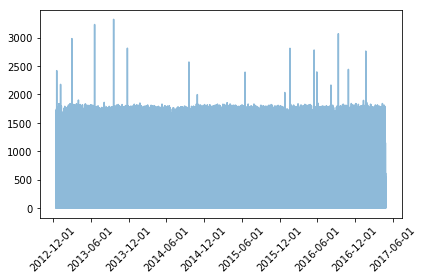

In [22]:
reader.plot_meters(app_name='fridge', meter_num=12) # plot single meter in whole time scope

In [14]:
lb = datestring2ts('1/02/2017')
ub = datestring2ts('8/02/2017')

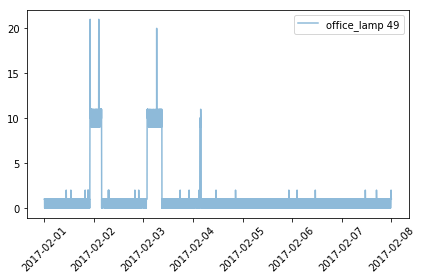

In [15]:
reader.plot_meters(lb, ub, app_name='office_lamp', meter_num=49) # plot single meter in given time window
plt.legend()
plt.show()

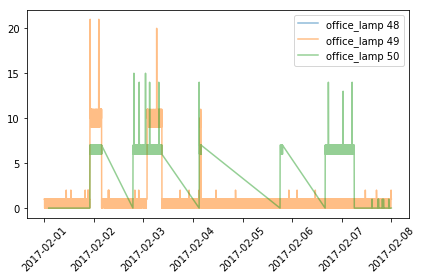

In [16]:
reader.plot_meters(lb, ub, app_name='office_lamp') # plot all meters with same name in same window
plt.legend()
plt.show()

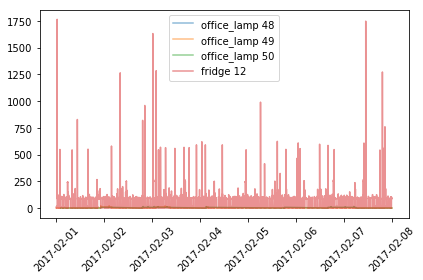

In [17]:
reader.plot_meters(lb, ub) # plot all meters in same window
plt.legend()
plt.show()

### Batch Reader

In [18]:
c = reader.read_single_meter('office_lamp', 48, 6, 4)

In [19]:
c

<generator object nilm_reader.read_single_meter at 0x10bf72e60>

In [20]:
for i in c:
    print(i)

[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]
[14 14 14 14 14 14]


In [21]:
for batch in reader.read_batch(reader.read_single_meter('office_lamp', 48, 6, 4), 5):
    print(batch)

[array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14])]
[array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14])]
[array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14]), array([14, 14, 14, 14, 14, 14])]
